# 5장 머신러닝 모델 훈련 기법

__감사말__

프랑소와 숄레의 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 5장에 사용된 코드에 대한 설명을 담고 있으며 텐서플로우 2.6 버전 이상에서 작성되었습니다. 소스코드를 공개한 저자에게 감사드립니다.

__구글 코랩 설정__

'런타임 -> 런타임 유형 변경' 메뉴에서 GPU를 지정한다.
TensorFlow 버전을 확인하려면 아래 명령문을 실행한다.

In [1]:
import tensorflow as tf
tf.__version__

'2.13.1'

TensorFlow가 GPU를 사용하는지 여부를 확인하려면 아래 명령문을 실행한다.
아래와 같은 결과가 나오면 GPU가 제대로 지원됨을 의미한다.

```
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
```

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**참고**

아래 코드에 대한 자세한 설명은
[머신러닝 모델 훈련 기법](https://codingalzi.github.io/dlp2/fundamentals_of_ml.html)를 
참고한다.

## 5.1 최적화, 일반화, 과대적합

### 예제: MNIST 데이터셋과 화이트 노이즈

MNIST 데이터셋에 **화이트 노이즈**(white noise)이 포함된 데이터셋과 그렇지 않은 데이터셋을 활용해서
훈련된 두 모델의 성능을 비교한다.

**데이터셋 준비**

In [6]:
from tensorflow.keras.datasets import mnist
import numpy as np

# MNIST 데이터셋 적재 및 전처리
(train_images, train_labels), _ = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

화이트 노이즈를 추가한 데이터셋을 준비한다.

In [8]:
# 화이트 노이즈 추가
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

In [10]:
train_images_with_noise_channels.shape

(60000, 1568)

화이트 노이즈가 들어간 샘플은 다음과 같이 보인다.

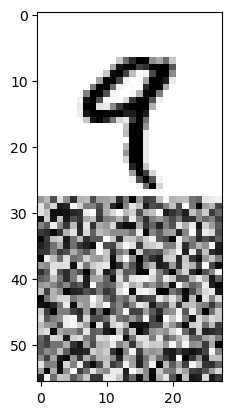

In [12]:
train_image_white4 = train_images_with_noise_channels[4].reshape((56, 28))

import matplotlib.pyplot as plt

digit = train_image_white4
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

0행렬을 추가하여 모양을 맞춘 데이터셋을 준비한다.

In [9]:
# 영 행렬 추가
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [11]:
train_images_with_zeros_channels.shape

(60000, 1568)

영 행렬이 추가된 샘플은 다음과 같이 보인다.

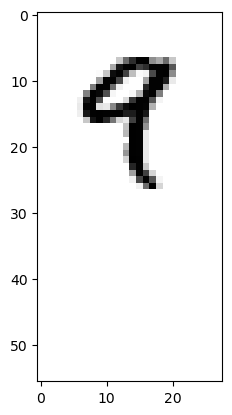

In [13]:
train_image_zeros4 = train_images_with_zeros_channels[4].reshape((56, 28))

import matplotlib.pyplot as plt

digit = train_image_zeros4
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

**모델 지정**

모델 구성과 컴파일을 함수를 이용하여 지정한다.

- 정수 레이블을 사용하기에 손실함수로 `sparse_categorical_crossentropy` 지정한다.

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

**백색 잡음이 추가된 데이터셋 훈련**

`validation_split` 키워드 인자는 검증셋 비율을 지정할 때 사용한다.

In [15]:
# 모델 생성 및 훈련
model = get_model()

history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 10s 6ms/step - loss: 0.6338 - accuracy: 0.8074 - val_loss: 0.3539 - val_accuracy: 0.8889
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2572 - accuracy: 0.9213 - val_loss: 0.2179 - val_accuracy: 0.9329
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1679 - accuracy: 0.9470 - val_loss: 0.1460 - val_accuracy: 0.9574
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1186 - accuracy: 0.9632 - val_loss: 0.1434 - val_accuracy: 0.9554
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0865 - accuracy: 0.9725 - val_loss: 0.1590 - val_accuracy: 0.9520
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0639 - accuracy: 0.9789 - val_loss: 0.1239 - val_accuracy: 0.9640
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0479 - accuracy: 0.9853 - val_loss: 0.1382 - val_accuracy: 0.9610
Epoch

**영 행렬이 추가된 데이터셋 훈련**

In [16]:
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.2966 - accuracy: 0.9135 - val_loss: 0.1605 - val_accuracy: 0.9544
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1263 - accuracy: 0.9641 - val_loss: 0.1018 - val_accuracy: 0.9701
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0818 - accuracy: 0.9758 - val_loss: 0.0872 - val_accuracy: 0.9735
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0586 - accuracy: 0.9824 - val_loss: 0.0807 - val_accuracy: 0.9764
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.0796 - val_accuracy: 0.9762
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0332 - accuracy: 0.9905 - val_loss: 0.0740 - val_accuracy: 0.9775
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0255 - accuracy: 0.9926 - val_loss: 0.0728 - val_accuracy: 0.9797
Epoch 

**훈련 결과 비교**

백색 잡음이 포함된 훈련셋을 이용한 모델의 정확도 성능이 1% 이상 낮다.

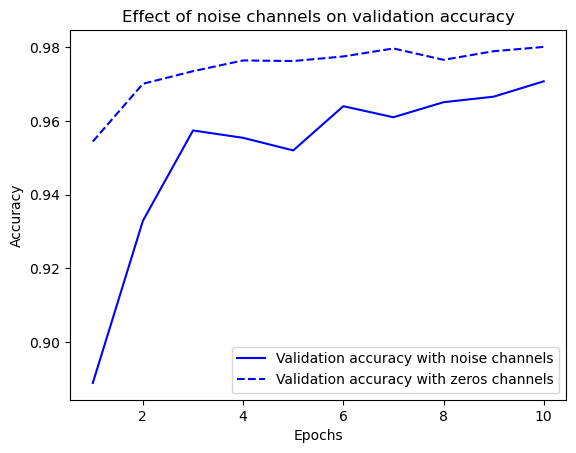

In [17]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]

epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")

plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## 5.2. 다양체 가설과 일반화

### 예제: MNIST 모델과 임의로 섞은 라벨

아래 코드는 임의로 섞은 레이블을 이용하여 MNIST 손글씨 숫자를 예측하는 모델을 훈련시킨다. 

**데이터셋 준비**

In [18]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

라벨(타깃)을 무작위로 섞는다.

In [19]:
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

**모델 구성 훈련**

매우 단순한 모델을 구성한 후에 훈련을 100 에포크 정도 시킨다.

In [20]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, random_train_labels,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 2.3156 - accuracy: 0.1031 - val_loss: 2.3057 - val_accuracy: 0.1038
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2994 - accuracy: 0.1160 - val_loss: 2.3133 - val_accuracy: 0.1022
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2925 - accuracy: 0.1251 - val_loss: 2.3144 - val_accuracy: 0.1033
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2803 - accuracy: 0.1385 - val_loss: 2.3238 - val_accuracy: 0.0979
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2650 - accuracy: 0.1516 - val_loss: 2.3289 - val_accuracy: 0.1063
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2462 - accuracy: 0.1627 - val_loss: 2.3391 - val_accuracy: 0.1033
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2249 - accuracy: 0.1774 - val_loss: 2.3471 - val_accuracy: 0.1041

Epoch 58/100
375/375 [==============================] - 2s 5ms/step - loss: 0.7992 - accuracy: 0.7391 - val_loss: 4.8092 - val_accuracy: 0.1030
Epoch 59/100
375/375 [==============================] - 2s 5ms/step - loss: 0.7844 - accuracy: 0.7448 - val_loss: 4.8839 - val_accuracy: 0.1036
Epoch 60/100
375/375 [==============================] - 2s 4ms/step - loss: 0.7689 - accuracy: 0.7496 - val_loss: 4.9831 - val_accuracy: 0.1039
Epoch 61/100
375/375 [==============================] - 2s 4ms/step - loss: 0.7528 - accuracy: 0.7567 - val_loss: 5.0157 - val_accuracy: 0.1038
Epoch 62/100
375/375 [==============================] - 2s 4ms/step - loss: 0.7404 - accuracy: 0.7597 - val_loss: 5.0968 - val_accuracy: 0.1052
Epoch 63/100
375/375 [==============================] - 1s 4ms/step - loss: 0.7250 - accuracy: 0.7649 - val_loss: 5.1637 - val_accuracy: 0.1045
Epoch 64/100
375/375 [==============================] - 2s 4ms/step - loss: 0.7082 - accuracy: 0.7711 - val_loss: 5.2243 - val_accuracy:

훈련셋에 대한 성능은 훈련하면서 계속 향상된다.
반면에 검증셋에 성능은 당연히 전혀 향상되지 않는다.

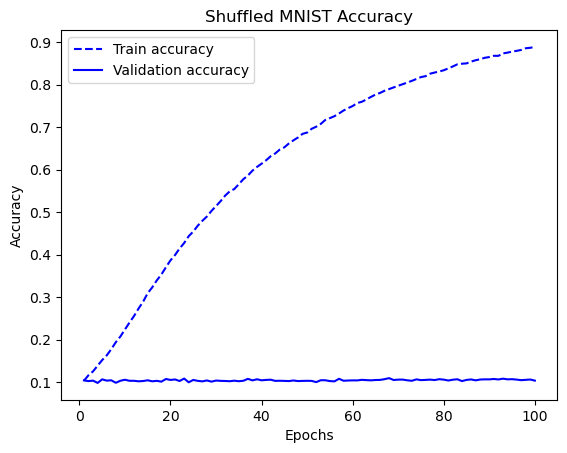

In [21]:
import matplotlib.pyplot as plt

train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, 101)

plt.plot(epochs, train_acc, "b--",
         label="Train accuracy")

plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy")

plt.title("Shuffled MNIST Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## 5.4 모델 훈련 최적화

**첫째 경우: 경사하강법 관련 파라미터 조정**

_학습률 조정_

* MNIST 모델 훈련: 매우 큰 학습률 사용
    - 학습률: 1 (옵티마이저의 옵션에서 지정)
    - 훈련셋/검증셋에 대한 정확도가 30% 수준에 머무름.

In [22]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 762.8706 - accuracy: 0.3363 - val_loss: 2.1964 - val_accuracy: 0.2094
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 3.8038 - accuracy: 0.1923 - val_loss: 2.2278 - val_accuracy: 0.1797
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 2.6084 - accuracy: 0.2070 - val_loss: 2.1869 - val_accuracy: 0.2071
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4889 - accuracy: 0.1883 - val_loss: 2.3286 - val_accuracy: 0.2078
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4637 - accuracy: 0.2042 - val_loss: 2.3231 - val_accuracy: 0.1877
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4088 - accuracy: 0.2190 - val_loss: 2.1789 - val_accuracy: 0.2386
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.6316 - accuracy: 0.2310 - val_loss: 2.5923 - val_accuracy: 0.2127
Epoc

* MNIST 모델 훈련: 매우 작은 학습률 사용
    - 학습률: 0.000001
    - 검증셋에 대한 정확도가 느리게 증가함

In [23]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-6),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 2.4586 - accuracy: 0.0468 - val_loss: 2.4059 - val_accuracy: 0.0616
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3606 - accuracy: 0.0743 - val_loss: 2.3099 - val_accuracy: 0.1006
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2683 - accuracy: 0.1319 - val_loss: 2.2184 - val_accuracy: 0.1828
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.1804 - accuracy: 0.2256 - val_loss: 2.1312 - val_accuracy: 0.2918
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.0966 - accuracy: 0.3374 - val_loss: 2.0477 - val_accuracy: 0.4024
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.0160 - accuracy: 0.4396 - val_loss: 1.9670 - val_accuracy: 0.4955
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 1.9382 - accuracy: 0.5183 - val_loss: 1.8892 - val_accuracy: 0.5598
Epoch 

* MNIST 모델 훈련: 적절한 학습률 사용
    - 학습률: 0.01
    - 제대로 훈련됨.

In [24]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3367 - accuracy: 0.9135 - val_loss: 0.1655 - val_accuracy: 0.9541
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1266 - accuracy: 0.9656 - val_loss: 0.1310 - val_accuracy: 0.9664
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0991 - accuracy: 0.9732 - val_loss: 0.1267 - val_accuracy: 0.9713
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0816 - accuracy: 0.9790 - val_loss: 0.1580 - val_accuracy: 0.9677
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0688 - accuracy: 0.9825 - val_loss: 0.1565 - val_accuracy: 0.9734
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0616 - accuracy: 0.9851 - val_loss: 0.1967 - val_accuracy: 0.9676
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0533 - accuracy: 0.9866 - val_loss: 0.1791 - val_accuracy: 0.9741
Epoch 

**셋째 경우: 모델의 정보 저장 능력 조정**

* MNIST 데이터셋 다중클래스 분류: 매우 단순한 모델
    - 은닉층이 없이 출력층 하나만 사용하는 매우 단순한 모델.
    - 검증셋의 정확도: 93% 정도에서 정체
    - 검증셋의 손실값: 0.25 이하로 내려가지 않음.
    - 결론적으로 모델의 정보 저장/분석 능력이 떨어진다. 

In [25]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6669 - accuracy: 0.8349 - val_loss: 0.3585 - val_accuracy: 0.9029
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3536 - accuracy: 0.9026 - val_loss: 0.3106 - val_accuracy: 0.9156
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3181 - accuracy: 0.9121 - val_loss: 0.2936 - val_accuracy: 0.9196
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3020 - accuracy: 0.9150 - val_loss: 0.2840 - val_accuracy: 0.9203
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2926 - accuracy: 0.9184 - val_loss: 0.2775 - val_accuracy: 0.9233
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2856 - accuracy: 0.9202 - val_loss: 0.2736 - val_accuracy: 0.9252
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2809 - accuracy: 0.9221 - val_loss: 0.2717 - val_accuracy: 0.9249
Epoch 

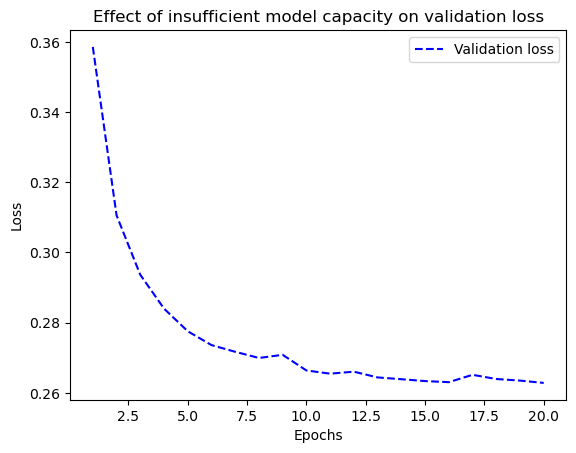

In [26]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss, "b--",
         label="Validation loss")

plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

* MNIST 데이터셋 다중클래스 분류: 훨씬 많은 저장/분석/표현 능력 모델
    - 두 개의 은닉층: 96개의 많은 유닛 사용
    - 잘 훈련되며 과대적합 발생 

In [27]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3676 - accuracy: 0.8954 - val_loss: 0.2048 - val_accuracy: 0.9374
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1598 - accuracy: 0.9529 - val_loss: 0.1362 - val_accuracy: 0.9604
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1118 - accuracy: 0.9662 - val_loss: 0.1136 - val_accuracy: 0.9658
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0856 - accuracy: 0.9741 - val_loss: 0.1071 - val_accuracy: 0.9679
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0682 - accuracy: 0.9804 - val_loss: 0.1077 - val_accuracy: 0.9674
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0555 - accuracy: 0.9831 - val_loss: 0.0923 - val_accuracy: 0.9735
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0465 - accuracy: 0.9850 - val_loss: 0.0977 - val_accuracy: 0.9731
Epoch 

8 에포크 정도 지나면서 일반화 성능이 떨어진다. 

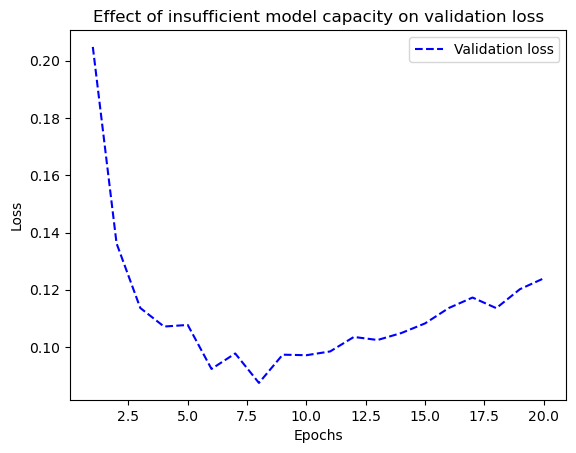

In [28]:
import matplotlib.pyplot as plt

val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss, "b--",
         label="Validation loss")

plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## 5.5. 일반화 향상법

### 5.5.2. 규제

**규제 기법 1: 신경망 크기 축소**

아래 코드는 이전에 다루었던 IMDB 데이터셋을 이용한 모델 훈련이다. 

In [29]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.5417 - accuracy: 0.7591 - val_loss: 0.4261 - val_accuracy: 0.8425
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3316 - accuracy: 0.8929 - val_loss: 0.3202 - val_accuracy: 0.8802
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2457 - accuracy: 0.9154 - val_loss: 0.3077 - val_accuracy: 0.8752
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1990 - accuracy: 0.9330 - val_loss: 0.2729 - val_accuracy: 0.8926
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1656 - accuracy: 0.9459 - val_loss: 0.2864 - val_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1440 - accuracy: 0.9535 - val_loss: 0.2824 - val_accuracy: 0.8888
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1219 - accuracy: 0.9616 - val_loss: 0.3160 - val_accuracy: 0.8797
Epoch 8/20
30

은닉층의 유닛수를 4로 만들어보자.

In [30]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 51ms/step - loss: 0.6492 - accuracy: 0.6446 - val_loss: 0.5993 - val_accuracy: 0.7599
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5551 - accuracy: 0.8138 - val_loss: 0.5165 - val_accuracy: 0.8088
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.4639 - accuracy: 0.8744 - val_loss: 0.4411 - val_accuracy: 0.8638
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3856 - accuracy: 0.9029 - val_loss: 0.3825 - val_accuracy: 0.8812
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3200 - accuracy: 0.9188 - val_loss: 0.3434 - val_accuracy: 0.8786
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2695 - accuracy: 0.9281 - val_loss: 0.3129 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2310 - accuracy: 0.9370 - val_loss: 0.2931 - val_accuracy: 0.8920
Epoch 8/20
30

기존 모델보다 과대적합이 늦게 발생한다.

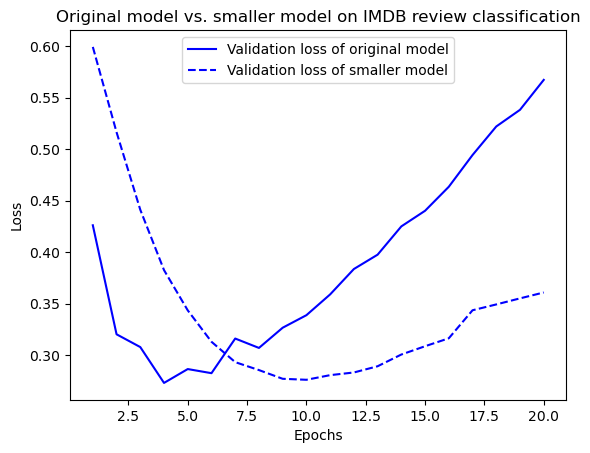

In [31]:
val_loss_original = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_smaller, "b--",
         label="Validation loss of smaller model")

plt.title("Original model vs. smaller model on IMDB review classification")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

이번엔 유닛 수를 크게 늘려보자.

In [32]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 80ms/step - loss: 0.5781 - accuracy: 0.7075 - val_loss: 0.3575 - val_accuracy: 0.8675
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3219 - accuracy: 0.8651 - val_loss: 0.3002 - val_accuracy: 0.8729
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2460 - accuracy: 0.8997 - val_loss: 0.3024 - val_accuracy: 0.8698
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1883 - accuracy: 0.9261 - val_loss: 0.3078 - val_accuracy: 0.8756
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1401 - accuracy: 0.9462 - val_loss: 0.3084 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1100 - accuracy: 0.9603 - val_loss: 0.3122 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0802 - accuracy: 0.9733 - val_loss: 0.3474 - val_accuracy: 0.8849
Epoch 8/20
30

기존 모델과의 차이점은 다음과 같다.

- 과대적합이 매우 빠르게 발생하며, 검증셋에 대한 성능이 매우 불안정하다.

**주의사항**: 검증셋이 너무 작아도 매우 불안정스러울 수 있다.

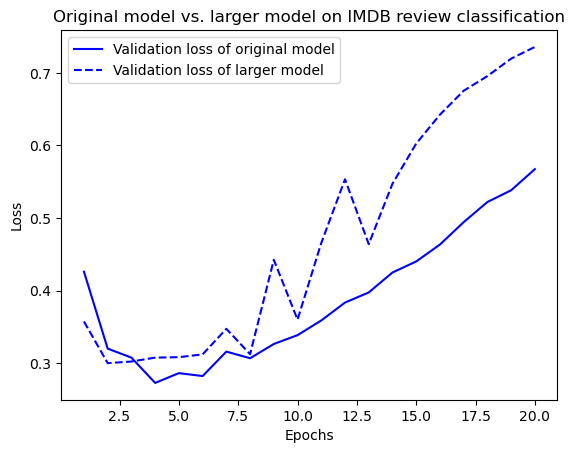

In [33]:
val_loss_original = history_original.history["val_loss"]
val_loss_larger = history_larger_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_larger, "b--",
         label="Validation loss of larger model")

plt.title("Original model vs. larger model on IMDB review classification")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**규제 기법 2: 가중치 규제**

아래 코드는 IMDB 훈련 모델에 L2 규제를 가한 결과를 보여준다.

- `regularizers.l2(0.002)`: 각 가중치의 제곱에 0.002 곱하기
- 규제는 훈련 중에만 적용되며 테스트에는 사용되지 않음.

In [34]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 90ms/step - loss: 0.6171 - accuracy: 0.7904 - val_loss: 0.4912 - val_accuracy: 0.8641
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4245 - accuracy: 0.8877 - val_loss: 0.3978 - val_accuracy: 0.8807
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3404 - accuracy: 0.9122 - val_loss: 0.3689 - val_accuracy: 0.8840
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3044 - accuracy: 0.9224 - val_loss: 0.3733 - val_accuracy: 0.8789
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2784 - accuracy: 0.9316 - val_loss: 0.3547 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2629 - accuracy: 0.9369 - val_loss: 0.3591 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2503 - accuracy: 0.9418 - val_loss: 0.3653 - val_accuracy: 0.8822
Epoch 8/20
30

L2 규제를 가한 결과는 다음과 같다.

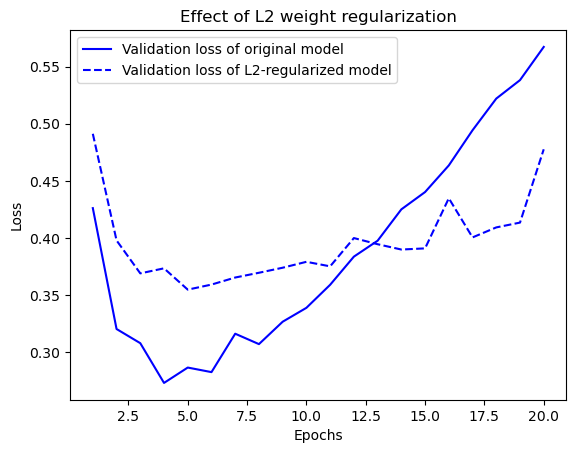

In [35]:
val_loss_original = history_original.history["val_loss"]
val_loss_l2_reg = history_l2_reg.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_l2_reg, "b--",
         label="Validation loss of L2-regularized model")

plt.title("Effect of L2 weight regularization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**규제 기법 3: 드롭아웃 적용**

아래 코드는 IMDB 데이터셋에 드롯아웃을 적용하여 훈련한다.

In [36]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 6s 57ms/step - loss: 0.6302 - accuracy: 0.6403 - val_loss: 0.5007 - val_accuracy: 0.8540
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5024 - accuracy: 0.7700 - val_loss: 0.4009 - val_accuracy: 0.8730
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4260 - accuracy: 0.8201 - val_loss: 0.3354 - val_accuracy: 0.8827
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3677 - accuracy: 0.8529 - val_loss: 0.3027 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3255 - accuracy: 0.8785 - val_loss: 0.2887 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2910 - accuracy: 0.8966 - val_loss: 0.2825 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2588 - accuracy: 0.9107 - val_loss: 0.2773 - val_accuracy: 0.8904
Epoch 8/20
30

50%의 드롭아웃을 적용한 결과는 다음과 같다.

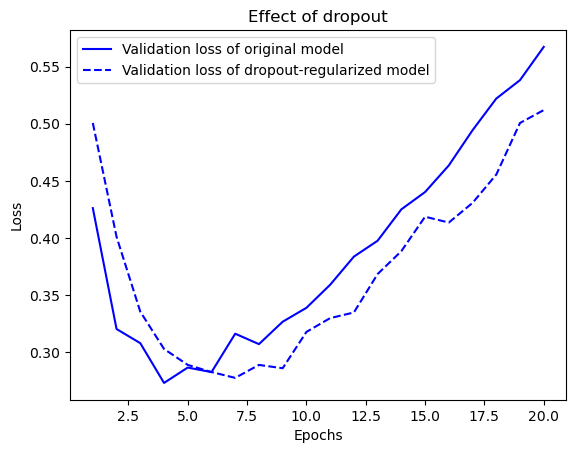

In [37]:
val_loss_original = history_original.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "b-",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_dropout, "b--",
         label="Validation loss of dropout-regularized model")

plt.title("Effect of dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()